In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objs as go

Air_Quality_Aotizhongxin = pd.read_csv('./air_quality/PRSA_Data_Aotizhongxin_20130301-20170228.csv')
print(Air_Quality_Aotizhongxin.shape)
Air_Quality_Aotizhongxin.head()


(35064, 18)


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


Check if there's any null figure.

In [2]:
Air_Quality_Aotizhongxin.isnull().any().any()

True

Find which column is null in

In [3]:
for x in Air_Quality_Aotizhongxin.columns:
    if Air_Quality_Aotizhongxin[x].isnull().any():
        print('{} has {} null values'.format(x, Air_Quality_Aotizhongxin[x].isnull().sum()))

PM2.5 has 925 null values
PM10 has 718 null values
SO2 has 935 null values
NO2 has 1023 null values
CO has 1776 null values
O3 has 1719 null values
TEMP has 20 null values
PRES has 20 null values
DEWP has 20 null values
RAIN has 20 null values
wd has 81 null values
WSPM has 14 null values


OK,let's drop them.

In [4]:
Air_Quality_Aotizhongxin.dropna(axis=0, inplace=True,how = 'any')

Now let's see the distribution of PM2.5, PM10, SO2, NO2, CO, O3

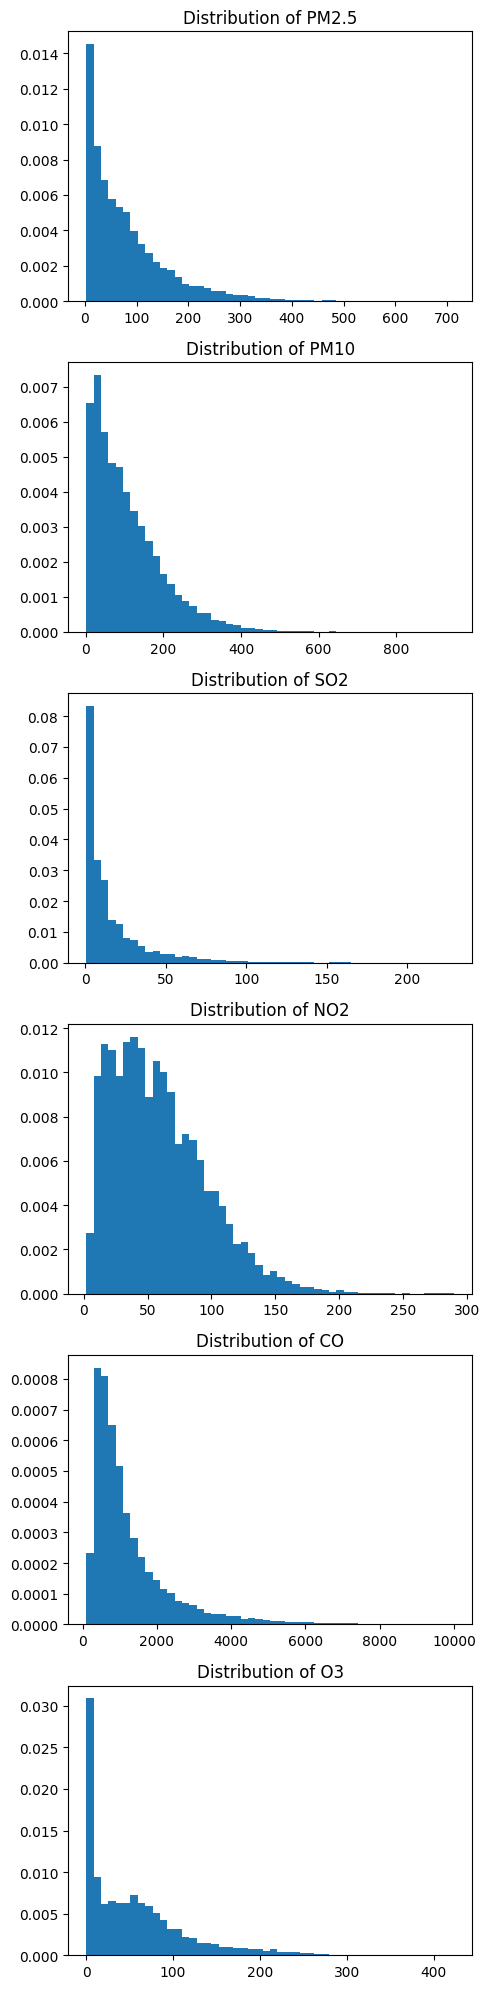

In [18]:
variables = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

fig, axs = plt.subplots(len(variables), figsize=(5, 20))

for i, var in enumerate(variables):
    axs[i].hist(Air_Quality_Aotizhongxin[var], bins = 50, density=True)
    axs[i].set_title(f'Distribution of {var}')

plt.tight_layout()
plt.show()

Seems like some them have similar distribution.
Let's put them together in one kde plot to see if there's any possible relations between any two of them.

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprec

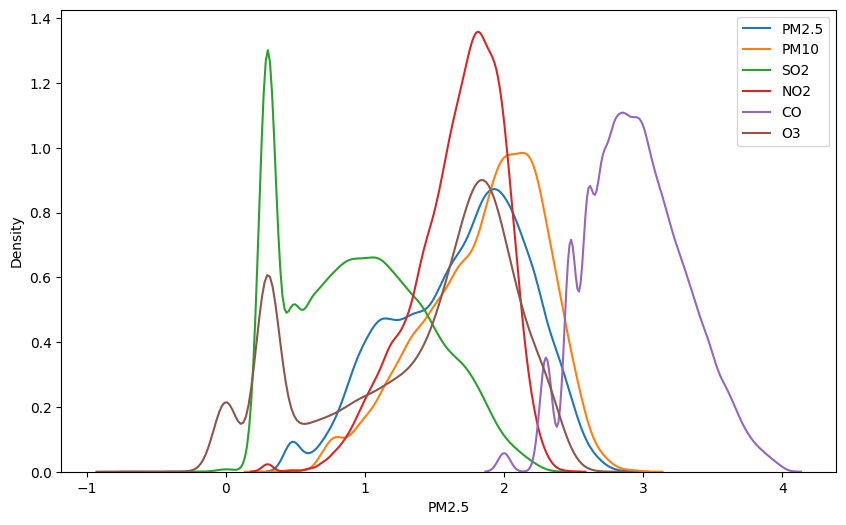

In [14]:
variables = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

plt.figure(figsize=(10, 6))

for var in variables:
    sns.kdeplot(np.log10(Air_Quality_Aotizhongxin[var]), label=var)

plt.legend()
plt.show()